In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from cgp import CGP
import re
from collections import defaultdict,OrderedDict


In [2]:
def extractParams(fileName):
    m=re.search("ex([0-9]+)Bat([0-9]+)ChEach([0-9]+)Nod([0-9]+)Lay([0-9]+)S([0-9]+)",fileName)
    example=m.group(1);batchSize=m.group(2);changeEach=m.group(3);numRows=m.group(4);numLayers=m.group(5);seed=m.group(6)
    return example, int(batchSize), int(changeEach), int(numRows), int(numLayers), int(seed)

In [9]:
allFiles=os.listdir("results")
popFiles=[file for file in allFiles if file.find(".pop.")!=-1]
fitFiles=[file for file in allFiles if file.find(".fit.")!=-1]
sizeFiles=[file for file in allFiles if file.find(".size.")!=-1]    

In [10]:
acc = {}
for file in popFiles:
    example, batchSize, changeEach, numRows, numLayers, seed=extractParams(file)
    data = np.genfromtxt("data/ex%s.valid.csv"%(example),delimiter=",");
    cgp = CGP(numRows,numLayers,1,data,seed);
    cgp.pop = np.load("results/"+file)
    cgp.useProbFit=False
    acc.setdefault(example,{})
    acc[example].setdefault((numRows,numLayers),{})
    acc[example][numRows,numLayers].setdefault(batchSize,{})
    acc[example][numRows,numLayers][batchSize].setdefault(changeEach,{})
    acc[example][numRows,numLayers][batchSize][changeEach].setdefault(seed,{})
    acc[example][numRows,numLayers][batchSize][changeEach][seed]["fit"],_,acc[example][numRows,numLayers][batchSize][changeEach][seed]["size"]=cgp.evaluateIndividual(0,cgp.pop[0],range(len(cgp.dataset)))
    

Box 1 = Arch (1, 10)-Batch 50-ChangeEach 500- numSeed 10
Box 2 = Arch (1, 10)-Batch 100-ChangeEach 500- numSeed 10
Box 3 = Arch (1, 10)-Batch 1000-ChangeEach 500- numSeed 10
Box 4 = Arch (1, 10)-Batch 3200-ChangeEach 500- numSeed 10
Box 5 = Arch (1, 10)-Batch 6400-ChangeEach 500- numSeed 10
Box 6 = Arch (1, 20)-Batch 50-ChangeEach 100- numSeed 10
Box 7 = Arch (1, 20)-Batch 50-ChangeEach 500- numSeed 10
Box 8 = Arch (1, 20)-Batch 50-ChangeEach 1000- numSeed 10
Box 9 = Arch (1, 20)-Batch 100-ChangeEach 100- numSeed 10
Box 10 = Arch (1, 20)-Batch 100-ChangeEach 500- numSeed 10
Box 11 = Arch (1, 20)-Batch 100-ChangeEach 1000- numSeed 10
Box 12 = Arch (1, 20)-Batch 1000-ChangeEach 100- numSeed 10
Box 13 = Arch (1, 20)-Batch 1000-ChangeEach 500- numSeed 10
Box 14 = Arch (1, 20)-Batch 1000-ChangeEach 1000- numSeed 10
Box 15 = Arch (1, 20)-Batch 3200-ChangeEach 100- numSeed 10
Box 16 = Arch (1, 20)-Batch 3200-ChangeEach 500- numSeed 10
Box 17 = Arch (1, 20)-Batch 3200-ChangeEach 1000- numSeed 

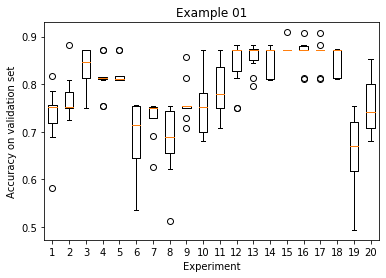

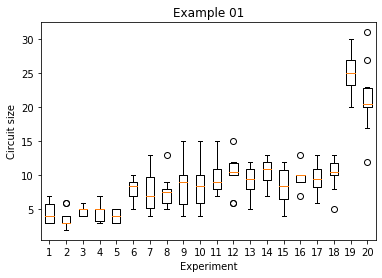

In [11]:
fitplot=[]
sizeplot=[]
captions = []
for example,v1 in acc.items(): #allExamples
    for arch,v2 in v1.items(): #allArchitectures
        ordBSize = OrderedDict(sorted(v2.items())) #order by batchSize
        for bs,v3 in ordBSize.items(): #allBatchSizes            
            ordChEach = OrderedDict(sorted(v3.items())) #order by changeEach
            for chEach,v4 in ordChEach.items():
                captions.append("Arch %s-Batch %i-ChangeEach %i- numSeed %i"%(arch,bs,chEach,len(v4)))
                accVet = np.zeros(len(v4))
                sizVet = np.zeros(len(v4))
                for seed,v5 in v4.items(): #all seeds                    
                    accVet[seed]=v5["fit"]
                    sizVet[seed]=v5["size"]
                fitplot.append(accVet)
                sizeplot.append(sizVet)

    #fig, ax = plt.subplots()
    #fit
    plt.figure()
    abc=plt.boxplot(fitplot)
    plt.title("Example "+example)
    plt.xlabel("Experiment")
    plt.ylabel("Accuracy on validation set")
    for k,caption in enumerate(captions):
        print("Box %i = %s"%(k+1,caption))
    #size
    plt.figure()
    abc=plt.boxplot(sizeplot)
    plt.title("Example "+example)
    plt.xlabel("Experiment")
    plt.ylabel("Circuit size")
    #for k,caption in enumerate(captions):
        #print("Box %i = %s"%(k+1,caption))

plt.show()

In [266]:
acc['01'][1,20][3200]

{100: {0: {'fit': 0.87296875, 'size': 9},
  1: {'fit': 0.87296875, 'size': 8},
  2: {'fit': 0.87296875, 'size': 11},
  3: {'fit': 0.87296875, 'size': 4},
  4: {'fit': 0.87296875, 'size': 6},
  5: {'fit': 0.87296875, 'size': 12},
  6: {'fit': 0.87296875, 'size': 8},
  7: {'fit': 0.87296875, 'size': 4},
  8: {'fit': 0.87296875, 'size': 11},
  9: {'fit': 0.90921875, 'size': 10}},
 500: {0: {'fit': 0.87296875, 'size': 10},
  1: {'fit': 0.87296875, 'size': 9},
  2: {'fit': 0.88171875, 'size': 10},
  3: {'fit': 0.81375, 'size': 7},
  4: {'fit': 0.87296875, 'size': 10},
  5: {'fit': 0.90734375, 'size': 9}}}